In [6]:
import sys
sys.path.insert(1, 'src')

from src.coins import *
from src.generator import generate_random_model
from src.flips import perform_coin_flips
from src.reverse_engineer import reverse_engineer_model
from src.benchmarker import calculate_model_error


ModuleNotFoundError: No module named 'numpy'

In [ ]:
iterations = 1000
num_flips = 1e4

models = []
complexity_data = []
error_data = []

debug = False

for i in range(iterations):
    input_model = generate_random_model(size_range=(1, 5), memory_depth_range=(1, 1))

    result = perform_coin_flips(input_model, int(num_flips))
    output_models = reverse_engineer_model(result.flip_history, input_model)
    error = [calculate_model_error(input_model, output_model, result.empirical_distribution, perform_coin_flips(output_model, int(num_flips)).empirical_distribution) for output_model in output_models]

    if debug:
        print(f'Iteration {i+1}: n={input_model.size}, m={input_model.memory_depth}, error={np.round(error, 1)}')

        if error[0] > 20:
            print('Input:',  '\n', input_model.probabilities, '\n', 
                  'Output:', '\n', output_models[0].probabilities)

    models.append(input_model)
    complexity_data.append(input_model.complexity)
    error_data.append(np.array(error).transpose())


NameError: name 'generate_random_model' is not defined

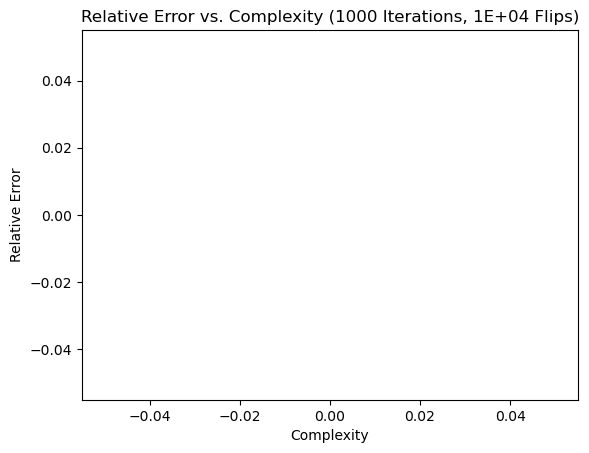

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(complexity_data, error_data)
# plt.yticks([0, 0.5, 1])
plt.xlabel('Complexity')
plt.ylabel('Relative Error')
plt.title(f'Relative Error vs. Complexity ({iterations} Iterations, {num_flips:.0E} Flips)')
plt.show()

print("Graphed")